#**Sarvesh Gaonkadkar**
#**Roll No. 21102B0001**
#**CMPN-B Batch1**
#**ML Prac 5**

#1. Data Preparation

In [4]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load classification dataset
breast_cancer_data = load_breast_cancer()
X_classification = breast_cancer_data.data
y_classification = breast_cancer_data.target

# Split the dataset
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Load regression dataset
california_housing = fetch_california_housing()
X_regression = california_housing.data
y_regression = california_housing.target

# Split the dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

#2. Implement XGBoost Models:

**Classification Task:**

In [5]:
# XGBoost Classifier without use_label_encoder
xgb_clf = xgb.XGBClassifier(eval_metric='logloss')  # Removed use_label_encoder
xgb_clf.fit(X_train_clf, y_train_clf)

# Predict on test set
y_pred_clf = xgb_clf.predict(X_test_clf)

# Evaluation metrics
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
auc = roc_auc_score(y_test_clf, y_pred_clf)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC: {auc}")

Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1-Score: 0.965034965034965
AUC: 0.9510317720275139


**Regression Task:**

In [7]:
# XGBoost Regressor
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_reg, y_train_reg)

# Predict on test set
y_pred_reg = xgb_reg.predict(X_test_reg)

# Evaluation metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MSE: {mse}")
print(f"R-Squared: {r2}")

MSE: 0.2225899267544737
R-Squared: 0.8301370561019205


#3. Performance Evaluation:

**Classification Task:**

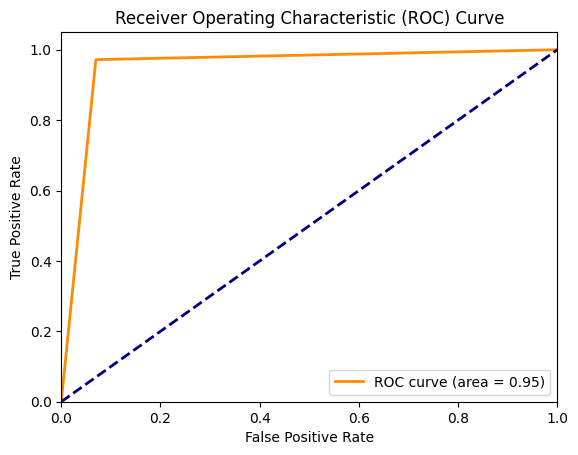

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_clf, y_pred_clf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Regression Task:**

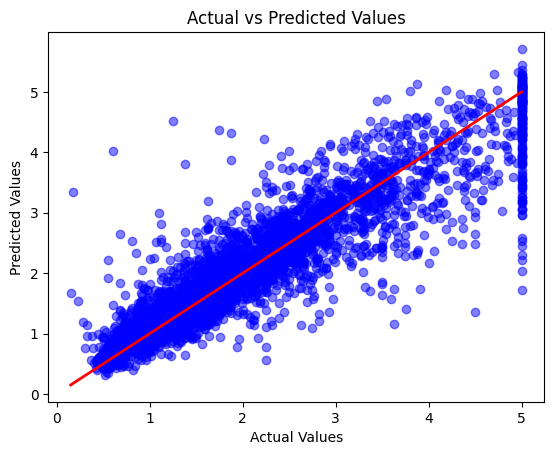

In [11]:
import numpy as np

# Plot Actual vs Predicted values
plt.figure()
plt.scatter(y_test_reg, y_pred_reg, color='blue', alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', lw=2)  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

#4. Summary of Analysis and Recommendations:

#### 1. **Comparison of XGBoost Performance:**
   - **Classification**: High accuracy, precision, and AUC indicate strong model performance. Recall might be slightly lower, suggesting possible false negatives.
   - **Regression**: Low MSE and high R-squared show that the model predicts well, but there could be overfitting risks.

#### 2. **Strengths of XGBoost:**
   - **Classification**: Excellent accuracy, precision, and AUC, especially good at distinguishing between classes.
   - **Regression**: Strong predictive power with low error rates and high explained variance.

#### 3. **Weaknesses of XGBoost:**
   - **Classification**: Lower recall could mean the model misses some positive cases. Interpretability is also limited.
   - **Regression**: Risk of overfitting, especially with many boosting rounds.

#### 4. **Recommendations:**
   - **Tuning Hyperparameters**: Adjust `learning_rate`, `max_depth`, and `n_estimators` to avoid overfitting and improve generalization.
   - **Feature Engineering**: Add or remove features to enhance performance.
   - **Cross-Validation**: Use k-fold cross-validation to better assess model stability and performance.